In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Import dataset

In [3]:
file = open('hr.csv')
hr = pd.read_csv('hr.csv')
file.close()
hr.tail()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see, the last rows are empty. They need to be dropped.

In [4]:
hr.dropna(axis='index', how="all", inplace=True)
hr.tail()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
305,"Daniele, Ann",1.411071e+09,1.0,1.0,0.0,3.0,3.0,3.0,0.0,54.1,...,IT/IS,Peter Monroe,7.0,Vendor Referral,Fully Meets,1.55,5.0,8.0,2/12/2019,0.0
306,"Lajiri, Jyoti",1.108028e+09,1.0,1.0,1.0,3.0,3.0,3.0,0.0,56.2,...,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,4.46,5.0,6.0,1/7/2019,0.0
307,"Semizoglou, Jeremiah",9.040136e+08,1.0,1.0,1.0,2.0,3.0,3.0,0.0,53.8,...,IT/IS,Peter Monroe,7.0,On-campus Recruiting,Fully Meets,3.27,4.0,5.0,1/14/2019,0.0
308,"South, Joe",1.308061e+09,0.0,0.0,1.0,1.0,3.0,3.0,0.0,53.0,...,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,5.00,3.0,4.0,1/2/2019,0.0
309,"Warfield, Sarah",1.301052e+09,0.0,4.0,0.0,1.0,3.0,3.0,0.0,55.2,...,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,1.06,4.0,8.0,2/5/2019,0.0


I discretize the pay rate.

In [5]:
pay_rate =["0-15", "15-30", "30-45", "45-60", "60-75", "75-90"]

In [6]:
def discretize(i):
  val = pay_rate[5]
  for j in range(6):
    if i < 15*(j+1):
      val = pay_rate[j]
      break
  return val

In [7]:
l = []
for i in hr.PayRate:
  l.append(discretize(i))
hr["pay"] = l
print(hr[["PayRate", "pay"]].tail())

     PayRate    pay
305     54.1  45-60
306     56.2  45-60
307     53.8  45-60
308     53.0  45-60
309     55.2  45-60


Merge the less frequent races.

In [8]:
def cat_race(i):
  if i == "White" or i =="Asian" or i== "Black or African American":
    return i
  else:
    return "other"

In [9]:
l = []
for i in hr.RaceDesc:
  l.append(cat_race(i))
hr["race"] = l
print(hr[["RaceDesc", "race"]].head(10))

                           RaceDesc                       race
0         Black or African American  Black or African American
1         Black or African American  Black or African American
2                             White                      White
3                             White                      White
4                             White                      White
5                             Asian                      Asian
6         Black or African American  Black or African American
7                             White                      White
8                             White                      White
9  American Indian or Alaska Native                      other


And change the names to the uniform format.

In [10]:
def strip(i):
  d = i.rstrip()
  full = d.split(",")
  if len(full)==1:
    fin = d
  elif len(full)==2:
    sur = full[1] + " " + full[0]
    fin = sur.strip()
  if fin == "Brandon  R LeBlanc":
    fin = "Brandon R. LeBlanc"
  elif fin == "Webster  L Butler":
    fin = "Webster Butler"
  return fin

In [11]:
c = []
for i in hr.Employee_Name:
  c.append(strip(i))
hr["imp_Name"] = c
print(hr[["Employee_Name", "imp_Name"]].head())

          Employee_Name           imp_Name
0            Brown, Mia          Mia Brown
1  LaRotonda, William    William LaRotonda
2      Steans, Tyrone        Tyrone Steans
3       Howard, Estelle     Estelle Howard
4           Singh, Nan           Nan Singh


In [12]:
hr['Department'] = hr['Department'].str.strip()

## Add palettes

In [2]:
palette_2 = ['#1A82FF', '#FF9E06']
palette_4 = ['#007929', '#024E68', '#A65500', '#A61A00']
my_palette = ['#00BB3F',	'#238C47',	'#007929',	'#37DD6F',	'#63DD8D',
              '#06799F',	'#216278',	'#024E68',	'#3AAACF',	'#61B4CF',
              '#FF8300',	'#BF7930',	'#A65500',	'#FFA240',	'#FFBB73',
              '#FF2800',	'#BF4630',	'#A61A00',	'#FF5D40',	'#FF8973']

In [35]:
import webcolors

def to_hex(t):
  a = '#'
  for y in t:
    a +='%02x' % y
  return a

def opacity_conv(palette, alpha):
  weaker = [webcolors.hex_to_rgb(h) for h in palette]
  weaker = [make_rgb_transparent(h, alpha) for h in weaker]
  weaker = [to_hex(h) for h in weaker]
  return weaker

def make_rgb_transparent(rgb, alpha):
  return tuple(int(alpha * c1 + (1 - alpha) * c2) for (c1, c2) in zip(rgb, (255,255,255)))

# Histograms and density plots

In [13]:
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
def density(df, col, value_name, group_labels):
  plt.figure(figsize=(10,5))
  j = 0
  for i in df[col].unique(): 
    x = df[df[col].isin([i])][value_name]
    sns.kdeplot(x, shade=True, label=group_labels[j])
    j += 1
  plt.legend()

In [22]:
def hist(df, col, value_name, title, palette):
  fig = make_subplots(rows=len(df[col].unique()), cols=1, shared_xaxes=True, 
                    vertical_spacing=0.1)
  j = 0
  for i in df[col].unique(): 
    j += 1
    x = df[df[col].isin([i])][value_name]
    n = len(x)
    fig.append_trace(go.Histogram(x=x,
             name=i + ": "+ str(n),
             histnorm='probability',
             marker = dict(color=palette[j-1]),
             ), 
             row=j, col=1)
    fig.update_layout(title="Plot Title")
    fig.update_yaxes(title_text="occurences", row=j, col=1)
    fig.update_xaxes(title_text=value_name, row=j, col=1)
  fig.update_layout(height=600, width=600, title_text=title)
  return fig

After that I plotted histograms and density plots for the two numeric values in the set: Engagement Survey and Pay Rate. I decided to take a look at their versions for the gender differences. After that, I made only histograms for the races. As I also created box and violin plots for the same data, I will place them here as well for better comparison.

## Gender and pay rates

In [23]:
fig = hist(hr, "Sex", "PayRate", "Pay rate for genders", palette_2)
fig.show()

In [26]:
fig = px.box(hr, y="PayRate", color="Sex", color_discrete_sequence=palette_2, hover_data=['Department'])
fig.show()

In [42]:
fig = px.violin(hr, y="PayRate", color="Sex", box=True, color_discrete_sequence=palette_2, hover_data=['Department'])
fig.show()

## Gender and engagement

In [28]:
fig = hist(hr, "Sex", "EngagementSurvey", "Engagement for genders", palette_2)
fig.show()

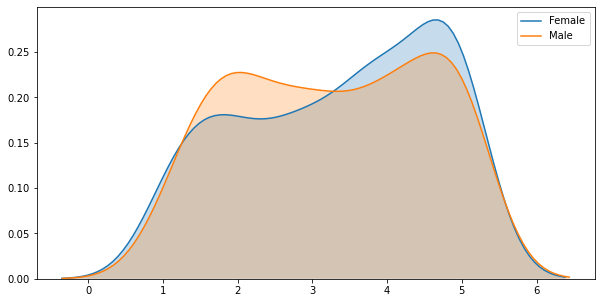

In [24]:
density(hr, "Sex", "EngagementSurvey", ["Female", "Male"])

As we can see, women are more engaged in their job than men, yet they are paid less.
It is so even despite the role of CEO designated to a woman.

## Race and pay rates

In [30]:
color = px.colors.qualitative.Plotly

In [31]:
fig = hist(hr, "RaceDesc", "PayRate", "Pay rate for races",
           color)
fig.update_layout(height=900, width=900)
fig.show()

In [40]:
fig = px.box(hr, y="PayRate", color="RaceDesc", hover_data=['Department'])
fig.show()

In [41]:
fig = px.violin(hr, y="PayRate", color="RaceDesc", box=True, hover_data=['Department'])
fig.show()

## Race and engagement

In [34]:
fig = hist(hr, "RaceDesc", "EngagementSurvey", "Engagement for races", color)
fig.update_layout(height=900, width=900)
fig.show()

I changed the bin width here as well, which turned out to be quite a good thing. I lost the "sombreros" for two of the plots, which turned to have no values in the midpoints of the plot.  
That is at least what I initially thought. As the data of Indians had extremely discrete structure, the calibration of the bin number should have been reconsidered. I used more scientific approach, setting the bin number to the square root of the number of samples for each histogram. It turned out that the number came back to the original value. Therefore, I checked the number of samples and wrote it down on the plots (there are final versions in this report). This way I realised that such a strange behaviour is to be expected - the numbers were simply smaller than for the rest of the categories and resulted in such unclear histograms.

## Merged rarer races

Therefore, I merged all the less common race categories into one, called "other". After that, I plotted the histograms once again:

In [36]:
color = opacity_conv(palette_4, 0.8)

In [38]:
fig = hist(hr, "race", "EngagementSurvey", "Engagement for races",
           color)
fig.update_layout(width=900)
fig.show()

This looks more informative. We can see that the minority races in the firm are actually quite engaged with their job. They never scored below 1, unlike the rest of the company workers.
And the other one for the pay rate:

In [39]:
fig = hist(hr, "race", "PayRate", "Pay rate for races",
           color)
fig.update_layout(width=900)
fig.show()

Contrary to the previous histograms for these groups, we can clearly see that there are two distinct categories within this group. The pay rate for the minority races is either low as for the production workers or quite high as for the software engineers or salespeople.

In [43]:
fig = px.box(hr, y="PayRate", color="race", color_discrete_sequence=palette_4, hover_data=['Department'])
fig.show()

In [44]:
fig = px.violin(hr, y="PayRate", color="race", box=True, 
                color_discrete_sequence=palette_4, hover_data=['Department'])
fig.show()

# Violin and box plots specifically

It is essential to remove too small traces, such as Executive Office - it consists of only 1 measurement, therefore plotting would be impossible.

In [45]:
hr_i = hr[~hr["Department"].isin(['Executive Office'])]

## for Department PayRate

In [46]:
dpts = list(hr_i.Department.unique())
dept = []
for dpt in dpts:
    x = hr_i['Department'][hr_i["Department"] == dpt]
    dept.append(": " + str(len(x)))
g = [dpts[i]+dept[i] for i in range(len(dept))]
fig = px.box(hr_i, y="PayRate", color="Department", x="Department")
fig.update_xaxes(
    ticktext=(g),
    tickvals=dpts)
fig.show()

In [47]:
fig = go.Figure()
dept = []
for dpt in dpts:
    x = hr_i['Department'][hr_i["Department"] == dpt]
    dept.append(": " + str(len(x)))
    fig.add_trace(go.Violin(x=x,
                            y=hr_i['PayRate'][hr_i["Department"] == dpt],
                            name=dpt,
                            box_visible=True,
                            meanline_visible=True))
g = [dpts[i]+dept[i] for i in range(len(dept))]
fig.update_xaxes(
    ticktext=(g),
    tickvals=dpts)
fig.show()

## Gender and pay rate in specific department

To check whether the drastic differences for pay rate in both gender groups occur because of the mean pay rates of specific departments, I created box and violin plots for these two variables combined. This will also give us some insight into the internal structures of the sections. I added the number of emplyees in the consecutive groups as they may vary a lot - some of the departments are rather small, after all, which may strongly influence the shape of the plots. 

In [48]:
genders = list(hr_i.Sex.unique())
dpts = list(hr_i.Department.unique())
f = [] 
m = []
for gender in genders:
    for dpt in dpts:
        if gender == "F":
            f.append("<br>F: " + str(len(hr_i['Department'][(hr_i["Sex"] == gender) & (hr_i["Department"] == dpt)])))
        else:
            m.append("<br>M: " + str(len(hr_i['Department'][(hr_i["Sex"] == gender) & (hr_i["Department"] == dpt)])))

g = [dpts[i]+f[i]+m[i] for i in range(len(f))]

fig = px.box(hr_i, x="Department", y="PayRate", color="Sex", color_discrete_sequence=palette_2)
fig.update_xaxes(
    ticktext=(g),
    tickvals=dpts)
fig.show()

We can see rather empty space in the middle ground of the plots, which explains the structure. The box plots in this situation are much more informative than the density ones, therefore I chose to use only boxes.

## Special project count and pay rate

As there is too little people with 8 projects, which makes plotting for this group impossible, I merge them with people having 7 projects completed.

In [50]:
def proj(i):
    if i >= 7.0:
        return "7 or more" + " projects"
    elif i == 2 or i == 3:
        return "2 or 3" + " projects"
    else:
        return str(int(i)) + " projects"

In [51]:
hr["project"] = [proj(i) for i in hr.SpecialProjectsCount]

I also noticed that there are no employees with only one project. Moreover, there is only one worker with 2 projects. Therefore, I merged the latter one with 3 projects' group.

In [53]:
dpts = sorted(hr.project.unique())
fig = go.Figure()
dept = []
for dpt in dpts:
    x = hr['project'][hr["project"] == dpt]
    dept.append(": " + str(len(x)))
    fig.add_trace(go.Violin(x=x,
                            y=hr['PayRate'][hr["project"] == dpt],
                            text=hr['Department'][hr["project"] == dpt],
                            name=dpt,
                            box_visible=True,
                            meanline_visible=True))
g = [dpts[i]+dept[i] for i in range(len(dept))]
fig.update_xaxes(
    ticktext=(g),
    tickvals=dpts)
fig.show()

The project count influences the pay rate to some extent. However, once again, there are two groups for some categories - especially for no special projects. I will not create the violin subplots for departments this time as there are too many categories. Instead I provide the scatter plot focusing on this correlation.

# Ridgeline plots

I planned on introducing the changing color dependent on the pay rate. However, after reading documentations for not only plotly, but also matplotlib and seaborn, I could not find the applicable solution. Therefore, I created the plots as shown below.

In [56]:
from plotly.colors import n_colors
colors = n_colors('rgb(5, 200, 200)', 'rgb(200, 10, 10)', 4, colortype='rgb')

## Pay rate based on performance score

In [65]:
dpts = hr.PerformanceScore.unique()
data = ([hr["PayRate"][hr.PerfScoreID==i].values for i in hr.PerfScoreID.unique()])

In [67]:
dept = []
for dpt in dpts:
    x = hr['PerformanceScore'][hr["PerformanceScore"] == dpt]
    dept.append(": " + str(len(x)))

fig = px.violin(hr,y='PerformanceScore',x='PayRate', color='PerformanceScore',
          orientation='h', color_discrete_sequence=colors).update_traces(side='positive',width=2)
g = [dpts[i]+dept[i] for i in range(len(dept))]
fig.update_yaxes(
    ticktext=(g),
    tickvals=dpts)
fig.show()

Basically, pay rate does not really depend on the performance score. This may suggest the influence of the department again. I will test it through scatter plot.

## Pay rate based on special projects

The same assumption as for the box plot holds.

In [69]:
dpts = sorted(hr.project.unique())
data = ([hr["PayRate"][hr.project==i].values for i in name])

In [70]:
dpts = name
dept = []
for dpt in dpts:
    x = hr['project'][hr['project'] == dpt]
    dept.append(": " + str(len(x)))
from plotly.colors import n_colors
colors = n_colors('rgb(5, 200, 200)', 'rgb(200, 10, 10)', 6, colortype='rgb')

fig = go.Figure()
i = 0
for data_line, color in zip(data, colors):
    fig.add_trace(go.Violin(x=data_line, name=name[i], line_color=color))
    i += 1
fig.update_traces(orientation='h', side='positive', width=2.5, points=False)
fig.update_layout(yaxis_zeroline=False, xaxis=dict(title='Pay Rate'))
g = [dpts[i]+dept[i] for i in range(len(dept))]
fig.update_yaxes(
    ticktext=(g),
    tickvals=dpts)
fig.show()

The ridgeline plot provides the same information as the violin plot does.